<a href="https://colab.research.google.com/github/austiezr/DS-Unit-1-Build/blob/master/Austin%20Robinson%20-%20DS%2012%20Unit%201%20Build%20-%20NUFORC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import folium

# Loading / Cleaning

In [0]:
# Loading csv
df = pd.read_csv('https://query.data.world/s/4tx6khwxam7o7vf5ukncsg5lescukm')
df.sample(5)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
52559,UFO with bright white tail almost crashed on h...,Lewisville,TX,2014-01-24T18:55:00,light,~10 seconds,Occurred : 1/24/2014 18:55 (Entered as : 01/2...,http://www.nuforc.org/webreports/106/S106623.html,UFO with bright white tail almost crashed on h...,2014-01-30T00:00:00,33.044734,-97.011264
41786,About 24 dozen red to yellow spheres witnessed...,Epping,NH,2012-08-18T17:30:00,oval,10 minutes,Occurred : 8/18/2012 17:30 (Entered as : 0818...,http://www.nuforc.org/webreports/091/S91950.html,About 24 dozen red to yellow spheres witnessed...,2012-08-19T00:00:00,43.050700,-71.080900
62627,I'M SURE OF WHAT I SAW.,Centereach,NY,2014-12-25T21:30:00,other,1 minute,Occurred : 12/25/2014 21:30 (Entered as : 12/...,http://www.nuforc.org/webreports/116/S116303.html,I'M SURE OF WHAT I SAW. I WAS DRIVING HOME ON ...,2015-01-07T00:00:00,40.873200,-73.081200
84480,"Very low red and green lights alternating, seq...",Los Angeles,CA,2019-02-28T18:00:00,changing,70 minutes,Occurred : 2/28/2019 18:00 (Entered as : 2/28...,http://www.nuforc.org/webreports/145/S145143.html,"Very low red and green lights alternating, seq...",2019-03-14T00:00:00,34.050707,-118.279935
49301,"Big, green shooting star, looking thing.",West Haven,UT,2013-05-05T23:00:00,fireball,15 seconds,Occurred : 5/5/2013 23:00 (Entered as : 05/05...,http://www.nuforc.org/webreports/097/S97587.html,"Big, green shooting star, looking thing. Somet...",2013-05-15T00:00:00,NaN,NaN


In [0]:
# Cleaning and Feature Extraction

df['date_time'] = pd.to_datetime(df['date_time'])
df['posted'] = pd.to_datetime(df['posted'])
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['date_time'] = df['date_time'].fillna(df['posted'])
df = df.drop(columns=['report_link', 'text', 'summary'])
df['time'] = df['date_time'].dt.time
df['date'] = df['date_time'].dt.date
df['day_of_month'] = df['date_time'].dt.day
df = df.dropna()

In [0]:
# Still plenty of reports after dropping incompletes

df.describe()

,city_latitude,city_longitude,day_of_week,month,year,day_of_month
count,67786.000000,67786.000000,67786.000000,67786.000000,67786.000000,67786.000000
mean,38.545930,-94.552139,3.201723,6.968342,2011.282758,15.264140
std,5.713503,18.161914,1.977500,3.228465,7.065488,8.940312
min,-32.055500,-170.494000,0.000000,1.000000,1969.000000,1.000000
25%,34.154618,-112.056777,2.000000,4.000000,2009.000000,7.000000
50%,39.125200,-88.214312,3.000000,7.000000,2013.000000,15.000000
75%,42.220300,-80.183389,5.000000,10.000000,2015.000000,23.000000
max,64.845276,116.000000,6.000000,12.000000,2019.000000,31.000000


In [0]:
# New DF, only the features I know I'll use

df1 = df[['city_latitude', 'city_longitude', 'shape', 'year', 'month', 'day_of_month', 'time', 'date']]

df1.sample(5)

,city_latitude,city_longitude,shape,year,month,day_of_month,time,date
77863,35.469900,-80.880100,light,2017.0,7.0,24.0,21:09:00,2017-07-24
62353,36.243659,-115.144963,circle,2015.0,2.0,26.0,18:45:00,2015-02-26
12785,42.567579,-83.380854,disk,1972.0,10.0,10.0,22:30:00,1972-10-10
42096,43.614445,-116.244678,sphere,2012.0,7.0,2.0,23:00:00,2012-07-02
56130,40.744307,-73.987724,fireball,2014.0,6.0,30.0,00:10:00,2014-06-30


In [0]:
# Monthly tables to pull specific stats

july = df1[df1['month']==7]
december = df1[df1['month']==12]
june = df1[df1['month']==6]
august = df1[df1['month']==8]
january = df1[df1['month']==1]
print(july['day_of_month'].value_counts().sum())
print((july['day_of_month'].value_counts().sum())/67786)
print(1400/8417)
print(1400/67786)
print(july.describe())

8417
0.12417018263358215
0.16633004633479861
0.020653232230844126
       city_latitude  city_longitude         year   month  day_of_month
count    8417.000000     8417.000000  8417.000000  8417.0   8417.000000
mean       39.293228      -93.617472  2010.932993     7.0     13.518831
std         5.465051       17.770109     7.621109     0.0      9.245588
min       -32.055500     -159.786200  1969.000000     7.0      1.000000
25%        35.352264     -111.865064  2009.000000     7.0      4.000000
50%        40.060879      -87.811200  2012.000000     7.0     12.000000
75%        42.679000      -80.077634  2015.000000     7.0     21.000000
max        64.845276      116.000000  2019.000000     7.0     31.000000


# Visualizations

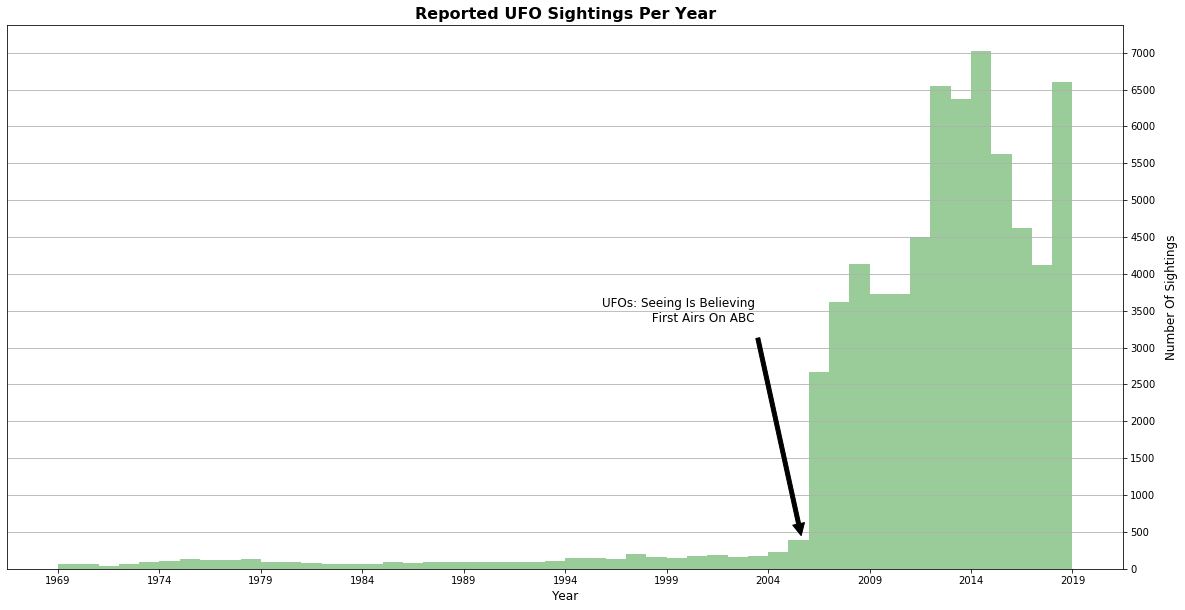

In [0]:
# Histogram of yearly sightings

fig, ax = plt.subplots()

fig.set_size_inches((20,10))
sns.distplot(df1['year'], bins=50, kde=False, color='green')
ax.set_xticks(ticks=(range(1969, 2020, 5)))
ax.set_xlabel('Year',
           {'fontsize' : 12})
ax.set_yticks(ticks=range(0, 7500, 500))
ax.set_ylabel('Number Of Sightings',
           {'fontsize' : 12},
           labelpad=10)
ax.set_title('Reported UFO Sightings Per Year',
         fontsize=16,
         fontweight='bold')
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
ax.grid(b=True, axis='y')

ax.annotate('''UFOs: Seeing Is Believing\n First Airs On ABC''', 
            xy=(2005.75, 300),  
            xycoords='data',
            xytext=(0.67, 0.5), 
            textcoords='axes fraction',
            arrowprops=dict(facecolor='black', 
                            shrink=0.05),
            horizontalalignment='right', 
            verticalalignment='top',
            fontsize=12)

ax.plot();
fig.savefig('Reported Sightings.png')

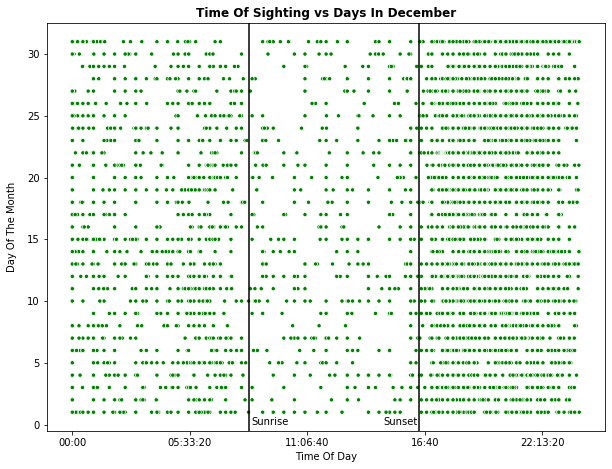

In [0]:
#Scatterplot showing density of sightings between sunset and sunrise

fig, ax = plt.subplots()

fig.set_size_inches(10, 7.5)
sns.scatterplot(december['time'], 
                december['day_of_month'], 
                color='green', 
                size=2, 
                legend=False)
ax.set_title('Time Of Sighting vs Days In December',
             fontsize=12,
             fontweight='bold')
ax.set_ylabel('Day Of The Month',
              fontweight=10,
              labelpad=10)
ax.set_xlabel('Time Of Day',
              fontweight=10)
plt.axvline(30000,
            color='black')
plt.text(30500, 0,
         s='Sunrise')
plt.axvline(59000,
            color='black')
plt.text(53000, 0,
         s='Sunset')
fig.savefig('December.png');

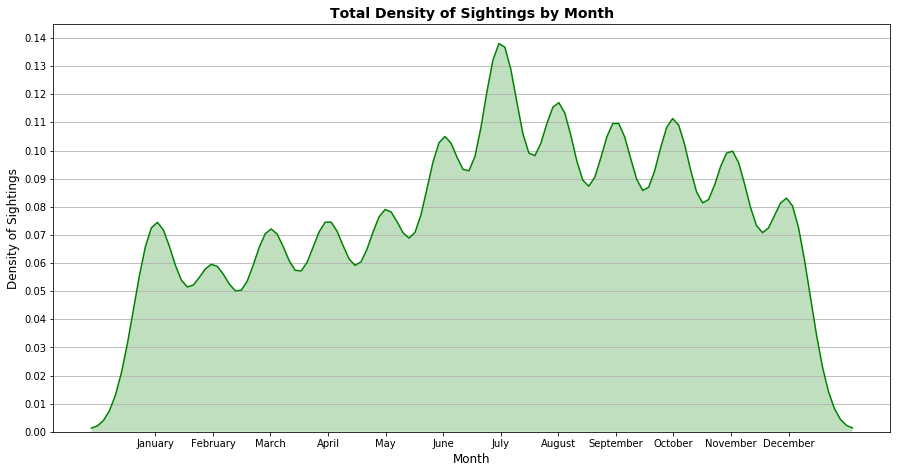

In [0]:
# KDE plot of sightings by month

fig, ax = plt.subplots()

fig.set_size_inches((15,7.5))
sns.kdeplot(df1['month'], shade=True, legend=False, color='green')
ax.set_xticks(ticks=range(1, 13))
ax.set_xticklabels(labels=['January', 'February', 'March', 'April',
                           'May', 'June', 'July', 'August',
                           'September', 'October', 'November', 'December'])
ax.set_xlabel('Month',
              fontsize=12)
ax.set_ylabel('Density of Sightings',
              fontsize=12)
ax.set_yticks(np.arange(0,.14,.01))
ax.grid(axis='y')
ax.set_title('Total Density of Sightings by Month',
             fontsize=14,
             fontweight='bold')

fig.savefig('Months.png');

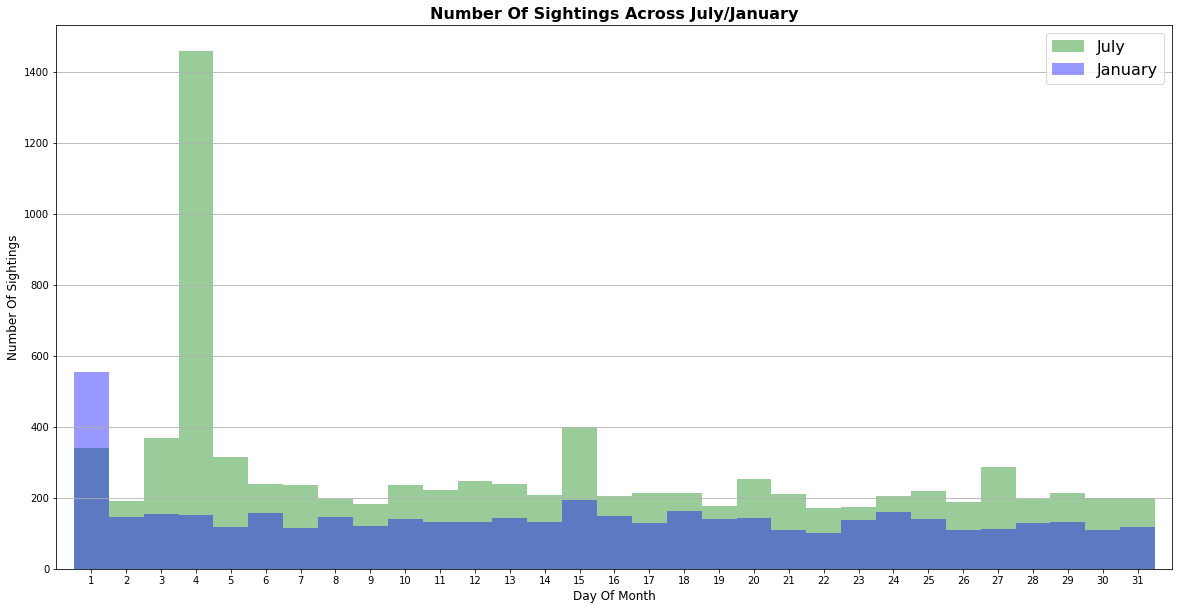

In [0]:
# Monthly Sightings, July vs. January, Showing Increase During Fireworks Holidays

fig, ax = plt.subplots()

fig.set_size_inches(20, 10)
sns.distplot(july['day_of_month'], bins=np.arange(33)-.5, kde=False, color='green', label='July')
sns.distplot(january['day_of_month'], bins=np.arange(33)-.5, kde=False, color='blue', label='January')

ax.legend(fontsize=16)
ax.set_xticks(range(1,32))
ax.set_xlabel('Day Of Month',
              fontsize=12)
ax.set_xlim(0,32)
ax.set_ylabel('Number Of Sightings',
              fontsize=12)
ax.set_title('Number Of Sightings Across July/January',
             fontsize=16,
             fontweight='bold')
ax.grid(axis='y')

fig.savefig('Sightings.png');

## Exploring 'Firework'-type sightings

In [0]:
# DF containing all july 4th sightings similar to fireworks

julyFourth = df1[(df1['month']==7) &
                 (df1['day_of_month']==4) &
                 ((df1['shape']=='light') |
                  (df1['shape']=='fireball') |
                  (df1['shape']=='circle') |
                  (df1['shape']=='sphere') |
                  (df1['shape']=='other') |
                  (df1['shape']=='oval') |
                  (df1['shape']=='flash') |
                  (df1['shape']=='triangle'))]

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


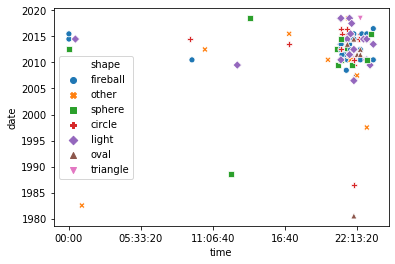

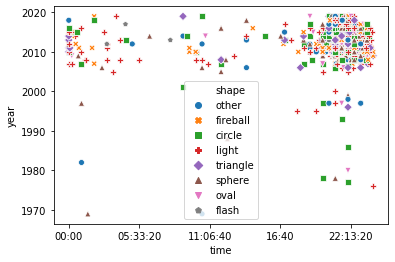

In [0]:
# scatter plots showing density of 'fireworks' sightings

julyFourthSample = julyFourth.sample(100)

sns.scatterplot(julyFourthSample['time'], julyFourthSample['date'], hue=julyFourthSample['shape'], style=julyFourthSample['shape'], legend='full')
plt.show()
sns.scatterplot(julyFourth['time'], julyFourth['year'], hue=julyFourth['shape'], style=julyFourth['shape'], legend='full');

In [0]:
# df containing 'fireworks' sightings from NYE celebrations 

januaryFirst = df1[(df1['month']==1) &
                 (df1['day_of_month']==1) &
                 ((df1['shape']=='light') |
                  (df1['shape']=='fireball') |
                  (df1['shape']=='circle') |
                  (df1['shape']=='sphere') |
                  (df1['shape']=='other') |
                  (df1['shape']=='oval') |
                  (df1['shape']=='flash') |
                  (df1['shape']=='triangle'))]

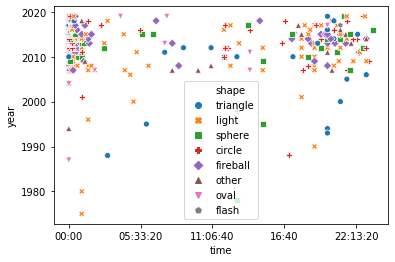

In [0]:
# scatterplot showing the density of sightings at midnight - fireworks time

sns.scatterplot(januaryFirst['time'], januaryFirst['year'], hue=januaryFirst['shape'], style=januaryFirst['shape'], legend='full')

# K-Means & Chloropleth

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


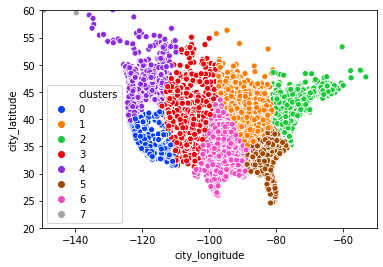

In [0]:
# K-Means Clustering

df2 = df1[['city_latitude', 'city_longitude']]

kmeans = KMeans().fit(df2)

labels = kmeans.labels_

new_series = pd.Series(labels)
df2['clusters'] = new_series.values
df2['shape'] = df1['shape']

sns.scatterplot(df2['city_longitude'], 
                df2['city_latitude'], 
                hue=df2['clusters'],
                palette='bright')
plt.xlim(-150,-50)
plt.ylim(20,60);

In [0]:
# Creating Chloropleth from KMeans clusters

df2Chloro = df2.copy()

df2Chloro['state'] = df['state']

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

m = folium.Map(location=[39, -98], zoom_start=5)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=df2Chloro,
    columns=['state', 'clusters'],
    bins=8,
    key_on='feature.id',
    fill_color='Set3',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='K-Means Clusters of Sightings'
).add_to(m)

folium.Marker(kmeans.cluster_centers_[0], popup=f"<b>Cluster Center ~ {df2Chloro['clusters'].value_counts()[0]} Sightings</b>").add_to(m)
folium.Marker(kmeans.cluster_centers_[1], popup=f"<b>Cluster Center ~ {df2Chloro['clusters'].value_counts()[1]} Sightings</b>").add_to(m)
folium.Marker(kmeans.cluster_centers_[2], popup=f"<b>Cluster Center ~ {df2Chloro['clusters'].value_counts()[2]} Sightings</b>").add_to(m)
folium.Marker(kmeans.cluster_centers_[3], popup=f"<b>Cluster Center ~ {df2Chloro['clusters'].value_counts()[3]} Sightings</b>").add_to(m)
folium.Marker(kmeans.cluster_centers_[4], popup=f"<b>Cluster Center ~ {df2Chloro['clusters'].value_counts()[4]} Sightings</b>").add_to(m)
folium.Marker(kmeans.cluster_centers_[6], popup=f"<b>Cluster Center ~ {df2Chloro['clusters'].value_counts()[6]} Sightings</b>").add_to(m)
folium.Marker(kmeans.cluster_centers_[5], popup=f"<b>Cluster Center ~ {df2Chloro['clusters'].value_counts()[5]} Sightings</b>").add_to(m)

folium.LayerControl().add_to(m)

m.save('Chloro.html')

In [0]:
df2[['day_of_month', 'month']] = df[['day_of_month', 'month']]
df2.head()

,city_latitude,city_longitude,clusters,shape,day_of_month,month
0,37.343152,-77.408582,2,light,12.0,12.0
1,41.664800,-72.639300,2,circle,22.0,3.0
3,45.381383,-75.708501,2,teardrop,17.0,4.0
5,30.677200,-94.005200,6,disk,2.0,4.0
6,32.259941,-110.927542,0,unknown,1.0,5.0


# Using Bayes' Theorem to calculate probability of having a sighting on July 4

In [0]:
# Finding false-positive rate for july 4th

dfProb = df2[(df2['day_of_month']==4) & (df2['month']==7)]
falsePositiveRate = (dfProb['shape'].value_counts()[:2].sum())/(dfProb['shape'].value_counts().sum())
falsePositiveRate

0.37945205479452054

In [0]:
'''
Probability of having had a prior sighting sourced from 20th Century Fox Survey.

False positive rate calculated from the number of sightings on july fourth
most similar to fireworks out of the total number of july fourth sightings.
'''

def prob_sighting(probSightingPrior=.17,
                  false_positive_rate=.38,
                  desired_accuracy=.95,
                  number_of_tests=1):

# Calculating probability via Bayes theorem
    numer = (1 - false_positive_rate) * probSightingPrior
    denom = numer + (false_positive_rate * (1 - probSightingPrior))
    probability = (numer / denom)
    print(f'{round(probability*100, 2)}% probability.')

# Iteration based off comparison to desired accuracy
    if probability < desired_accuracy:
        number_of_tests += 1
        prob_sighting(probSightingPrior=probability, 
                                  number_of_tests=number_of_tests)
    elif probability >= desired_accuracy:
        print(f'{number_of_tests} years necessary.')

prob_sighting()

25.05% probability.
35.29% probability.
47.08% probability.
59.21% probability.
70.31% probability.
79.44% probability.
86.31% probability.
91.14% probability.
94.38% probability.
96.48% probability.
10 years necessary.


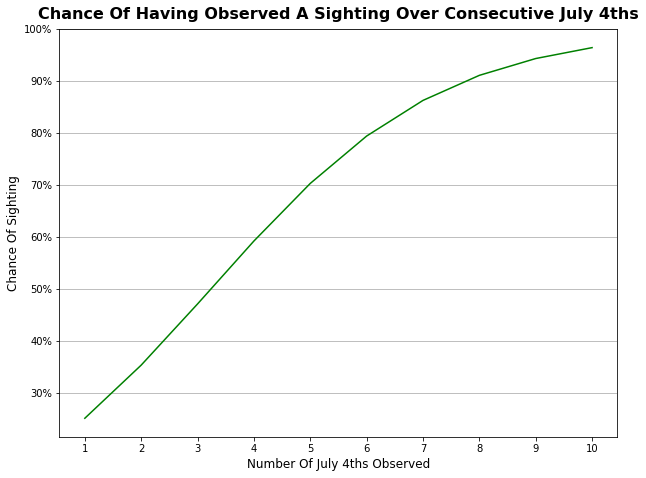

In [0]:
# Plotting the probability

fig, ax = plt.subplots()

fig.set_size_inches(10,7.5)

sns.lineplot(x=range(1,11,1), 
             y=[.2505, .3529, .4708, .5921, .7031, 
                .7944, .8631, .9114, .9438, .9648],
             color='green')

ax.set_xticks(range(1,11,1))
ax.set_yticks([.3, .4, .5, .6, .7, .8, .9, 1])
ax.set_yticklabels(['30%', '40%', '50%', '60%',
                    '70%', '80%', '90%', '100%'])
ax.set_ylabel('Chance Of Sighting',
              fontsize=12)
ax.set_xlabel('Number Of July 4ths Observed',
              fontsize=12)
ax.grid(axis='y')
ax.set_title('Chance Of Having Observed A Sighting Over Consecutive July 4ths',
             fontsize=16,
             fontweight='bold',
             pad=10)

fig.savefig('Bayes.png')